In [15]:
 ### Keras and Tensorflow >2.0
import pandas as pd

In [16]:

### Data Collection
import pandas_datareader as pdr
key=""

In [17]:
df = pdr.get_data_tiingo('AAPL', api_key='908a42efa01dc9ab0534afadabf482f9ae623dc2')

In [19]:
df.to_csv('AAPL.csv')

In [23]:
df = pd.read_csv(r'E:\ML notes\NLP Notes\Stock Price Prediction And Forecasting Using Stacked LSTM\AAPL.csv')

In [25]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-02-12 00:00:00+00:00,93.99,94.5000,93.010,94.19,40351381,21.851428,21.969997,21.623591,21.897926,161405524,0.0,1.0
1,AAPL,2016-02-16 00:00:00+00:00,96.64,96.8500,94.610,95.02,49057916,22.467518,22.516340,21.995570,22.090890,196231664,0.0,1.0
2,AAPL,2016-02-17 00:00:00+00:00,98.12,98.2100,96.150,96.67,44863243,22.811599,22.832522,22.353600,22.474493,179452972,0.0,1.0
3,AAPL,2016-02-18 00:00:00+00:00,96.26,98.8900,96.091,98.84,39020983,22.379173,22.990613,22.339883,22.978989,156083932,0.0,1.0
4,AAPL,2016-02-19 00:00:00+00:00,96.04,96.7599,95.800,96.00,35374173,22.328026,22.495393,22.272229,22.318727,141496692,0.0,1.0


In [26]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,AAPL,2021-02-02 00:00:00+00:00,134.99,136.31,134.61,135.73,82266419,134.787956,136.105980,134.408525,135.526848,82266419,0.000,1.0
1252,AAPL,2021-02-03 00:00:00+00:00,133.94,135.77,133.61,135.76,89880937,133.739528,135.566789,133.410022,135.556804,89880937,0.000,1.0
1253,AAPL,2021-02-04 00:00:00+00:00,137.39,137.40,134.59,136.30,84183061,137.184364,137.194349,134.388555,136.095995,84183061,0.000,1.0
1254,AAPL,2021-02-05 00:00:00+00:00,136.76,137.42,135.86,137.35,75693830,136.760000,137.420000,135.860000,137.350000,75693830,0.205,1.0
1255,AAPL,2021-02-08 00:00:00+00:00,136.91,136.96,134.92,136.03,71297214,136.910000,136.960000,134.920000,136.030000,71297214,0.000,1.0


In [27]:
df1 = df.reset_index()['close']

In [28]:
df1

0        93.99
1        96.64
2        98.12
3        96.26
4        96.04
         ...  
1251    134.99
1252    133.94
1253    137.39
1254    136.76
1255    136.91
Name: close, Length: 1256, dtype: float64

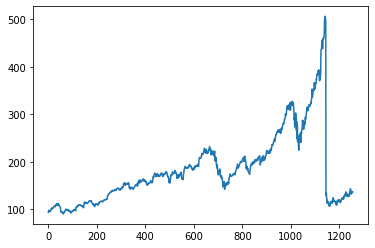

In [30]:
import matplotlib.pyplot as plt
plt.plot(df1)
plt.show()

In [31]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [32]:
import numpy as np

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [34]:
df1.shape

(1256, 1)

In [36]:
 print(df1)

[[0.00877931]
 [0.01515334]
 [0.01871317]
 ...
 [0.11316897]
 [0.11165364]
 [0.11201443]]


In [37]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [38]:
training_size,test_size

(816, 440)

In [39]:
train_data

array([[0.00877931],
       [0.01515334],
       [0.01871317],
       [0.01423933],
       [0.01371016],
       [0.01573061],
       [0.01046302],
       [0.01385448],
       [0.01544197],
       [0.01580277],
       [0.0152736 ],
       [0.02450992],
       [0.02503909],
       [0.02684305],
       [0.03047505],
       [0.02773301],
       [0.02571257],
       [0.02592904],
       [0.02604931],
       [0.02867108],
       [0.02929645],
       [0.03425135],
       [0.03759471],
       [0.03718581],
       [0.03747444],
       [0.03745039],
       [0.03939868],
       [0.03797956],
       [0.03687312],
       [0.03571858],
       [0.04170776],
       [0.04622971],
       [0.04485869],
       [0.04726398],
       [0.04998196],
       [0.04683103],
       [0.04959711],
       [0.04377631],
       [0.04406494],
       [0.04493085],
       [0.04834636],
       [0.05219483],
       [0.05233915],
       [0.04692724],
       [0.0412267 ],
       [0.03985568],
       [0.04038485],
       [0.037

In [40]:

import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [41]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [42]:

print(X_train.shape), print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [43]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [45]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1) # converted into 3-D because 
# we will give X_train.shape[1] , 1 this two as input to LSTM
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [46]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [49]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True)) # stack LSTM model which means one after the another
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Train on 715 samples, validate on 339 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
715/715 [==============================] - 6s 8ms/sample - loss: 0.0122 - val_loss: 0.0361
Epoch 2/100
715/715 [==============================] - 3s 4ms/sample - loss: 0.0025 - val_loss: 0.0256
Epoch 3/100
715/715 [==============================] - 2s 3ms/sample - loss: 0.0012 - val_loss: 0.0201
Epoch 4/100
715/715 [==============================] - 2s 3ms/sample - loss: 4.4708e-04 - val_loss: 0.0206 - ETA: 0s - loss: 4.471
Epoch 5/100
715/715 [==============================] - 2s 3ms/sample - loss: 3.4572e-04 - val_loss: 0.0186
Epoch 6/100
715/715 [==============================] - 3s 4ms/sample - loss: 3.1729e-04 - val_loss: 0.0177
Epoch 7/100
715/715 [==============================] - 4s 5ms/sample - loss: 3.2005e-04 - val_loss: 0.0175
Epoch 8/100
715/715 [==============================] - 4s 5ms/sample - loss: 2.9967e-04 - val_loss: 0.0170
Epoch 9/100
715/715 [=================

715/715 [==============================] - 4s 5ms/sample - loss: 1.3719e-04 - val_loss: 0.0088
Epoch 75/100
715/715 [==============================] - 4s 5ms/sample - loss: 1.4484e-04 - val_loss: 0.0092
Epoch 76/100
715/715 [==============================] - 4s 5ms/sample - loss: 1.3827e-04 - val_loss: 0.0085
Epoch 77/100
715/715 [==============================] - 3s 5ms/sample - loss: 1.3084e-04 - val_loss: 0.0086
Epoch 78/100
715/715 [==============================] - 4s 5ms/sample - loss: 1.1378e-04 - val_loss: 0.0083
Epoch 79/100
715/715 [==============================] - 3s 5ms/sample - loss: 1.1877e-04 - val_loss: 0.0081
Epoch 80/100
715/715 [==============================] - 4s 5ms/sample - loss: 1.1257e-04 - val_loss: 0.0079
Epoch 81/100
715/715 [==============================] - 4s 5ms/sample - loss: 1.1541e-04 - val_loss: 0.0078
Epoch 82/100
715/715 [==============================] - 3s 5ms/sample - loss: 1.1586e-04 - val_loss: 0.0076
Epoch 83/100
715/715 [===================

In [52]:
import tensorflow as tf

In [53]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [54]:

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [55]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

165.73019487873376

In [56]:

### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

272.5698146289215

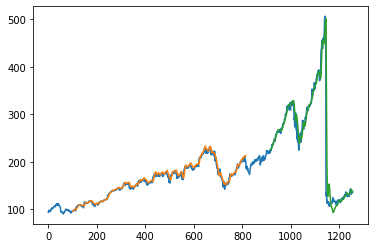

In [57]:

### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## for predict the  future 30 days and plot the output 

In [60]:

len(test_data)

440

In [62]:

x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [63]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [64]:
temp_input

[0.05241130487071555,
 0.04810583283223091,
 0.03968731208659049,
 0.04748045700541187,
 0.05164161154539987,
 0.04036079374624174,
 0.04300661455201443,
 0.05277209861695731,
 0.05921828021647624,
 0.05712567648827421,
 0.06126277811184605,
 0.06361996392062536,
 0.05455201443174984,
 0.062922429344558,
 0.05488875526157544,
 0.059506915213469624,
 0.059242333132892344,
 0.06405291641611544,
 0.08192423331328924,
 0.07398677089597111,
 0.07420324714371618,
 0.07304870715574258,
 0.06898376428141911,
 0.061671677690920024,
 0.06535177390258567,
 0.06381238725195432,
 0.06111846061334936,
 0.059410703547805144,
 0.05943475646422125,
 0.06316295850871917,
 0.05017438364401683,
 0.06008418520745634,
 0.04454600120264579,
 0.04432952495490078,
 0.04834636199639203,
 0.05919422730006013,
 0.06900781719783522,
 0.06819001803968727,
 0.062489476849067915,
 0.06164762477450386,
 0.0701142513529765,
 0.0694407696933253,
 0.06956103427540589,
 0.07206253758268188,
 0.06987372218881538,
 0.066602

In [65]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.1110162]
101
1 day input [0.04810583 0.03968731 0.04748046 0.05164161 0.04036079 0.04300661
 0.0527721  0.05921828 0.05712568 0.06126278 0.06361996 0.05455201
 0.06292243 0.05488876 0.05950692 0.05924233 0.06405292 0.08192423
 0.07398677 0.07420325 0.07304871 0.06898376 0.06167168 0.06535177
 0.06381239 0.06111846 0.0594107  0.05943476 0.06316296 0.05017438
 0.06008419 0.044546   0.04432952 0.04834636 0.05919423 0.06900782
 0.06819002 0.06248948 0.06164762 0.07011425 0.06944077 0.06956103
 0.07206254 0.06987372 0.06660253 0.06806975 0.06494287 0.05654841
 0.05972339 0.06179194 0.06313891 0.06905592 0.07788334 0.07874925
 0.07841251 0.07675286 0.08036079 0.08187613 0.07562237 0.0791341
 0.0771377  0.07562237 0.09029465 0.09012628 0.09226699 0.08734817
 0.0911365  0.09991581 0.09770295 0.10013229 0.11148527 0.10710764
 0.10434155 0.1018641  0.09397474 0.09782321 0.08721587 0.09760673
 0.10032471 0.09294047 0.09250752 0.09753458 0.0927721  0.08851473
 0.09017438 0.10027661 0.11191822 0

9 day output [[0.1219606]]
10 day input [0.06126278 0.06361996 0.05455201 0.06292243 0.05488876 0.05950692
 0.05924233 0.06405292 0.08192423 0.07398677 0.07420325 0.07304871
 0.06898376 0.06167168 0.06535177 0.06381239 0.06111846 0.0594107
 0.05943476 0.06316296 0.05017438 0.06008419 0.044546   0.04432952
 0.04834636 0.05919423 0.06900782 0.06819002 0.06248948 0.06164762
 0.07011425 0.06944077 0.06956103 0.07206254 0.06987372 0.06660253
 0.06806975 0.06494287 0.05654841 0.05972339 0.06179194 0.06313891
 0.06905592 0.07788334 0.07874925 0.07841251 0.07675286 0.08036079
 0.08187613 0.07562237 0.0791341  0.0771377  0.07562237 0.09029465
 0.09012628 0.09226699 0.08734817 0.0911365  0.09991581 0.09770295
 0.10013229 0.11148527 0.10710764 0.10434155 0.1018641  0.09397474
 0.09782321 0.08721587 0.09760673 0.10032471 0.09294047 0.09250752
 0.09753458 0.0927721  0.08851473 0.09017438 0.10027661 0.11191822
 0.11720986 0.12647023 0.1270475  0.12440168 0.11244738 0.10010824
 0.10535177 0.10739627 

19 day output [[0.13371906]]
20 day input [0.07420325 0.07304871 0.06898376 0.06167168 0.06535177 0.06381239
 0.06111846 0.0594107  0.05943476 0.06316296 0.05017438 0.06008419
 0.044546   0.04432952 0.04834636 0.05919423 0.06900782 0.06819002
 0.06248948 0.06164762 0.07011425 0.06944077 0.06956103 0.07206254
 0.06987372 0.06660253 0.06806975 0.06494287 0.05654841 0.05972339
 0.06179194 0.06313891 0.06905592 0.07788334 0.07874925 0.07841251
 0.07675286 0.08036079 0.08187613 0.07562237 0.0791341  0.0771377
 0.07562237 0.09029465 0.09012628 0.09226699 0.08734817 0.0911365
 0.09991581 0.09770295 0.10013229 0.11148527 0.10710764 0.10434155
 0.1018641  0.09397474 0.09782321 0.08721587 0.09760673 0.10032471
 0.09294047 0.09250752 0.09753458 0.0927721  0.08851473 0.09017438
 0.10027661 0.11191822 0.11720986 0.12647023 0.1270475  0.12440168
 0.11244738 0.10010824 0.10535177 0.10739627 0.10487072 0.11316897
 0.11165364 0.11201443 0.1110162  0.11182234 0.11293689 0.1141799
 0.11546924 0.11677316 

29 day output [[0.1456609]]
[[0.11101619899272919], [0.11182233691215515], [0.11293689161539078], [0.11417990177869797], [0.11546923965215683], [0.11677315831184387], [0.11808011680841446], [0.11938414722681046], [0.12067955732345581], [0.1219606027007103], [0.12322227656841278], [0.12446125596761703], [0.1256762146949768], [0.12686792016029358], [0.12803860008716583], [0.12919187545776367], [0.13033193349838257], [0.1314634084701538], [0.13259097933769226], [0.1337190568447113], [0.13485166430473328], [0.13599234819412231], [0.13714417815208435], [0.1383095681667328], [0.13949039578437805], [0.14068809151649475], [0.14190354943275452], [0.14313733577728271], [0.14438983798027039], [0.1456609070301056]]


In [66]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [67]:
import matplotlib.pyplot as plt

In [68]:
len(df1)

1256

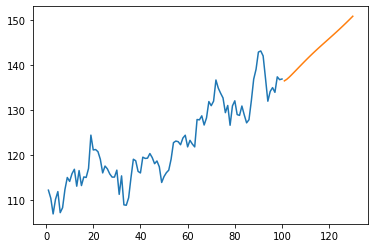

In [70]:
plt.plot(day_new,scaler.inverse_transform(df1[1156:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

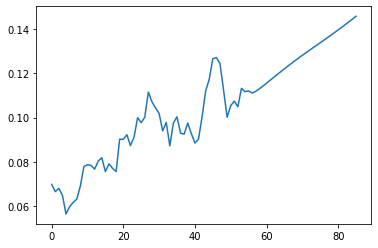

In [71]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [72]:
df3=scaler.inverse_transform(df3).tolist()

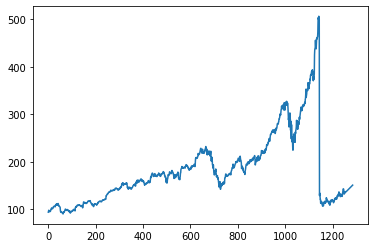

In [73]:
plt.plot(df3)